In [1]:
import pandas as pd
import shutil
import time
from pathlib import Path

MAX_SAMPLE_SIZE = 40000

In [2]:
train_df = pd.read_csv("./data/train.csv")
train_df.head()

,filename,category
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,3
2,f6c172096818c5fab10ecae722840798.jpg,3
3,251ffd610399ac00fea7709c642676ee.jpg,3
4,73c7328b8eda399199fdedec6e4badaf.jpg,3


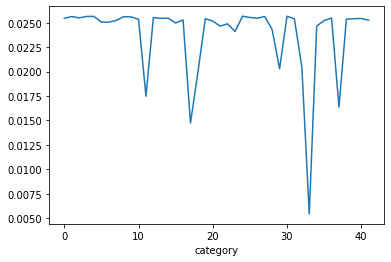

In [3]:
cat_df = train_df.groupby("category").count()
cat_df = cat_df.rename(columns = {"filename": "weight"})
cat_df["normalised_weight"] = cat_df["weight"].apply(lambda x: x / cat_df["weight"].sum())
cat_df["normalised_weight"].plot()

In [4]:
grouped_df = train_df.sample(frac = 1).groupby("category")
sample_df = pd.DataFrame(columns = ["filename", "category"])
for idx, group in grouped_df:
    num_items = int(cat_df.loc[idx]["normalised_weight"] * MAX_SAMPLE_SIZE)
    sample = group.head(num_items)
    sample_df = pd.concat([sample_df, sample])
sample_df = sample_df.sample(frac = 1)
sample_df.head()

,filename,category
104459,4671f23768d9d6e702bd68bf4011864f.jpg,25
69933,ba7d40bc04b3f000396311c593404a25.jpg,8
50934,47be2fda96ce827e8898712805e5daa6.jpg,38
27130,1452757f8039cf8099502052b1f5dbd4.jpg,11
90231,25b557d193af7b3089b803f1b57fadfa.jpg,12


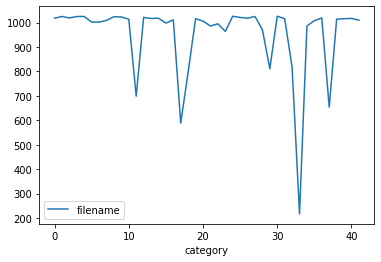

In [5]:
sample_df.groupby("category").count().plot()

In [6]:
sample_df["path"] = sample_df["category"].apply(lambda x: "{:02d}/".format(x))
sample_df["path"] = sample_df["path"] + sample_df["filename"]
sample_df.head()

,filename,category,path
104459,4671f23768d9d6e702bd68bf4011864f.jpg,25,25/4671f23768d9d6e702bd68bf4011864f.jpg
69933,ba7d40bc04b3f000396311c593404a25.jpg,8,08/ba7d40bc04b3f000396311c593404a25.jpg
50934,47be2fda96ce827e8898712805e5daa6.jpg,38,38/47be2fda96ce827e8898712805e5daa6.jpg
27130,1452757f8039cf8099502052b1f5dbd4.jpg,11,11/1452757f8039cf8099502052b1f5dbd4.jpg
90231,25b557d193af7b3089b803f1b57fadfa.jpg,12,12/25b557d193af7b3089b803f1b57fadfa.jpg


In [7]:
train_dir = Path("./data/train/")
sample_dir = Path("./data/sample-ub-{}/".format(MAX_SAMPLE_SIZE))

start_time = time.time()
count = 0
for path in sample_df["path"]:
    input_filepath = train_dir / path
    output_filepath = sample_dir / path
    output_filepath.parent.mkdir(parents = True, exist_ok = True)
    shutil.copy(str(input_filepath), str(output_filepath))
    count += 1
    print("Completed {} in {:.2f}s".format(count, time.time() - start_time), end = "\r")